In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# import glob
from os import path

In [3]:
fpath=r'G:\My Drive\UW Research\fr-XAS July 2018\Data\Versastat'

file_str1=fpath+r'\1% O2 EIS OCV.csv'
if path.exists(file_str1):
    data1=np.array(pd.read_csv(file_str1,delimiter=',',engine='python',usecols=[9,10,11,12,13,14,15,16],
                        skip_blank_lines=True).dropna(how='all'))
    labels=list('1% O2')

file_str2=fpath+r'\10% O2 EIS OCV.csv'
if path.exists(file_str2):
    data2=np.array(pd.read_csv(file_str2,delimiter=',',engine='python',usecols=[9,10,11,12,13,14,15,16],
                        skip_blank_lines=True).dropna(how='all'))
    labels.append('10% O2')

file_str3=fpath+r'\100% O2 EIS OCV.csv'
if path.exists(file_str3):
    data3=np.array(pd.read_csv(file_str3,delimiter=',',engine='python',usecols=[9,10,11,12,13,14,15,16],
                        skip_blank_lines=True).dropna(how='all'))
    labels.append('100% O2')


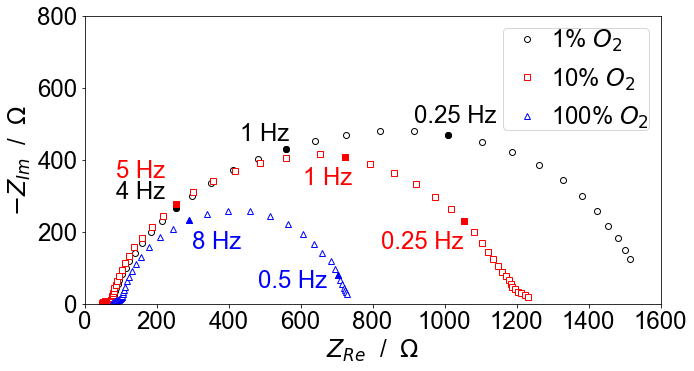

In [47]:
fig=plt.figure(figsize=(10,10))

# 1% O2 highlight points
filled1=np.array([[data1[40,5],data1[45,5],data1[50,5]],
                 [-data1[40,6],-data1[45,6],-data1[50,6]]]).T

filled2=np.array([[data2[43,5],data2[50,5],data2[56,5]],
                 [-data2[43,6],-data2[50,6],-data2[56,6]]]).T

filled3=np.array([[data3[37,5],data3[48,5]],
                 [-data3[37,6],-data3[48,6]]]).T


ax1=fig.add_axes([.1, .1, .8, .4])
ax1.plot(data1[:,5],-data1[:,6],color=(0,0,0),marker='o',mfc=(1,1,1),linestyle='',label='1% $O_2$')
ax1.plot(data2[:,5],-data2[:,6],color=(1,0,0),marker='s',mfc=(1,1,1),linestyle='',label='10% $O_2$')
ax1.plot(data3[:,5],-data3[:,6],color=(0,0,1),marker='^',mfc=(1,1,1),linestyle='',label='100% $O_2$')
ax1.legend(loc=1)
ax1.plot(filled1[:,0],filled1[:,1], color=(0,0,0),marker='o',mfc=(0,0,0),linestyle='',zorder=4)
ax1.plot(filled2[:,0],filled2[:,1],color=(1,0,0),marker='s',mfc=(1,0,0),linestyle='',zorder=5)
ax1.plot(filled3[:,0],filled3[:,1],color=(0,0,1),marker='^',mfc=(0,0,1),linestyle='',zorder=6)

ax1.yaxis.set_major_locator(ticker.MultipleLocator(200))
ax1.set(xlim=[0,1600],ylim=[0, 800])


# title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal'}
title_font = {'family':'Arial', 'size':'24', 'weight':'normal'}
mpl.rc('font',**title_font)
ax1.set_ylabel(r'$-Z_{Im}$  /  $\Omega$')#,**title_font)
ax1.set_xlabel(r'$Z_{Re}$  /  $\Omega$')#,**title_font)
ax1.legend(loc=1,borderpad=0, handletextpad=0)

ax1.annotate('0.25 Hz', xy=(filled1[2,0],filled1[2,1]), xytext=(filled1[2,0]+20,filled1[2,1]+20),
            ha='center', va='bottom')
ax1.annotate('1 Hz', xy=(filled1[1,0],filled1[1,1]), xytext=(filled1[1,0]+10,filled1[1,1]+10),
            ha='right', va='bottom')
ax1.annotate('4 Hz', xy=(filled1[0,0],filled1[0,1]), xytext=(filled1[0,0]-30,filled1[0,1]+15),
            ha='right', va='bottom')

ax1.annotate('0.25 Hz', xy=(filled2[2,0],filled2[2,1]),color='red', xytext=(filled2[2,0],filled2[2,1]-25),
            ha='right', va='top')
ax1.annotate('1 Hz', xy=(filled2[1,0],filled2[1,1]),color='red', xytext=(filled2[1,0]+20,filled2[1,1]-25),
            ha='right', va='top')
ax1.annotate('5 Hz', xy=(filled2[0,0],filled2[0,1]),color='red', xytext=(filled2[0,0]-30,filled2[0,1]+60),
            ha='right', va='bottom')

ax1.annotate('0.5 Hz', xy=(filled3[1,0],filled3[1,1]),color='blue', xytext=(filled3[1,0]-30,filled3[1,1]-15),
            ha='right', va='center')
ax1.annotate('8 Hz', xy=(filled3[0,0],filled3[0,1]),color='blue', xytext=(filled3[0,0]+10,filled3[0,1]-30),
            ha='left', va='top')


# plt.show()
plt.savefig('EIS for fr-XAS.png',dpi=400,format='png',bbox_inches='tight')